In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Import libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("Titanic-Dataset.csv")

# View the first few rows
print(data.head())

# Check for null values
print(data.isnull().sum())

# Overview of the data
print(data.info())
print(data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [3]:
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns=['Cabin'], inplace=True)  # Drop 'Cabin' due to many missing values

# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop irrelevant columns
data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

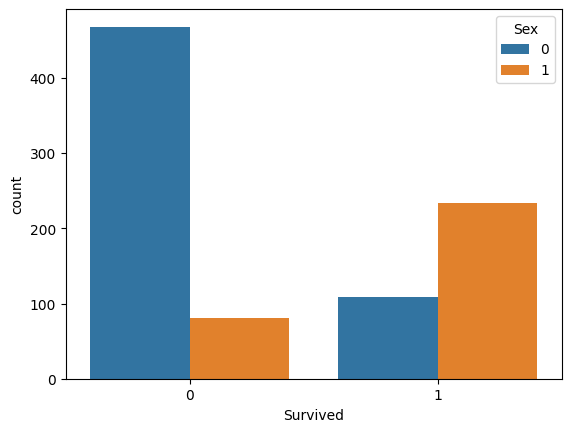

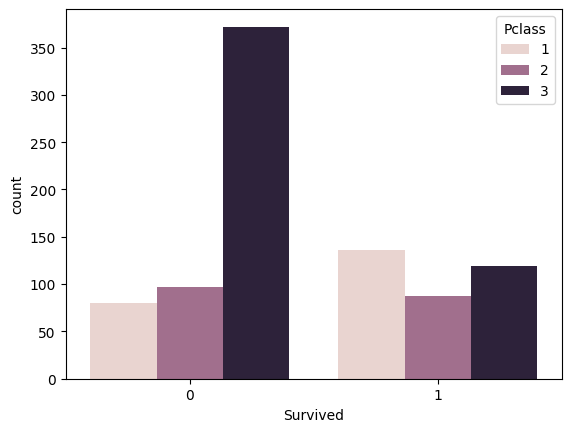

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize survival based on gender
sns.countplot(x='Survived', hue='Sex', data=data)
plt.show()

# Visualize survival based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.show()


In [5]:
# Create new features (e.g., FamilySize)
data['FamilySize'] = data['SibSp'] + data['Parch']

# Drop redundant columns
data.drop(columns=['SibSp', 'Parch'], inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))


Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Accuracy: 0.8379888268156425
